In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [7]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


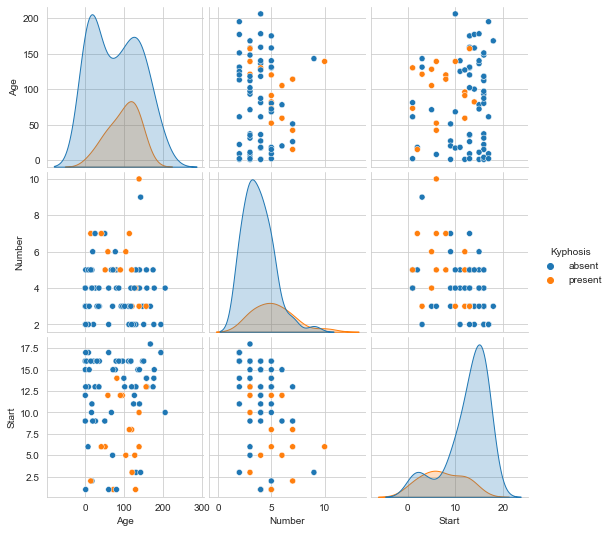

In [22]:
sns.pairplot(df, hue='Kyphosis')

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('Kyphosis', axis =1)
y = df['Kyphosis']

In [56]:
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.3, random_state=101)

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtree = DecisionTreeClassifier()

In [59]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
predictions = dtree.predict(X_test)

In [61]:
predictions

array(['absent', 'absent', 'absent', 'present', 'present', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'present', 'present', 'present',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent'], dtype=object)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.90      0.77      0.83        47
     present       0.31      0.56      0.40         9

    accuracy                           0.73        56
   macro avg       0.61      0.66      0.61        56
weighted avg       0.81      0.73      0.76        56

[[36 11]
 [ 4  5]]


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc = RandomForestClassifier(n_estimators=200)

In [66]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [67]:
rfc_predictions = rfc.predict(X_test)

In [68]:
print(classification_report(y_test, rfc_predictions))
print(confusion_matrix(y_test, rfc_predictions))

              precision    recall  f1-score   support

      absent       0.89      0.83      0.86        47
     present       0.33      0.44      0.38         9

    accuracy                           0.77        56
   macro avg       0.61      0.64      0.62        56
weighted avg       0.80      0.77      0.78        56

[[39  8]
 [ 5  4]]
